# Data Balancing
### Run this script if dealing with classification modelling situation 1 and 3. Refer the project document (data balancing section)
## Script output is balanced datasets as they apply to model modell

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import resample # for resampling


In [33]:
data = pd.read_csv('./diabetic_data_prepared.csv')

In [34]:
data.columns
print("\n number of records: ", len(data))
print("\n number of columns: ", len(data.columns))


 number of records:  99492

 number of columns:  45


In [35]:
for n in range(0,3):
    print("\n readmitted value : ", n, " : ", data[data.readmitted == n].readmitted.count()/data.readmitted.count())


 readmitted value :  0  :  0.535882281992522

 readmitted value :  1  :  0.3518574357737306

 readmitted value :  2  :  0.11226028223374744


# Correlation map before imbalance reduction

In [36]:
#Seperate features and possible targets (original and synthetic per the 3 type classification)
Ys = pd.DataFrame(data, columns=['readmitted','readmit_noreadmit','readmit_in_30_days'])
data_1 = data.drop(columns=['readmitted','readmit_noreadmit','readmit_in_30_days'])

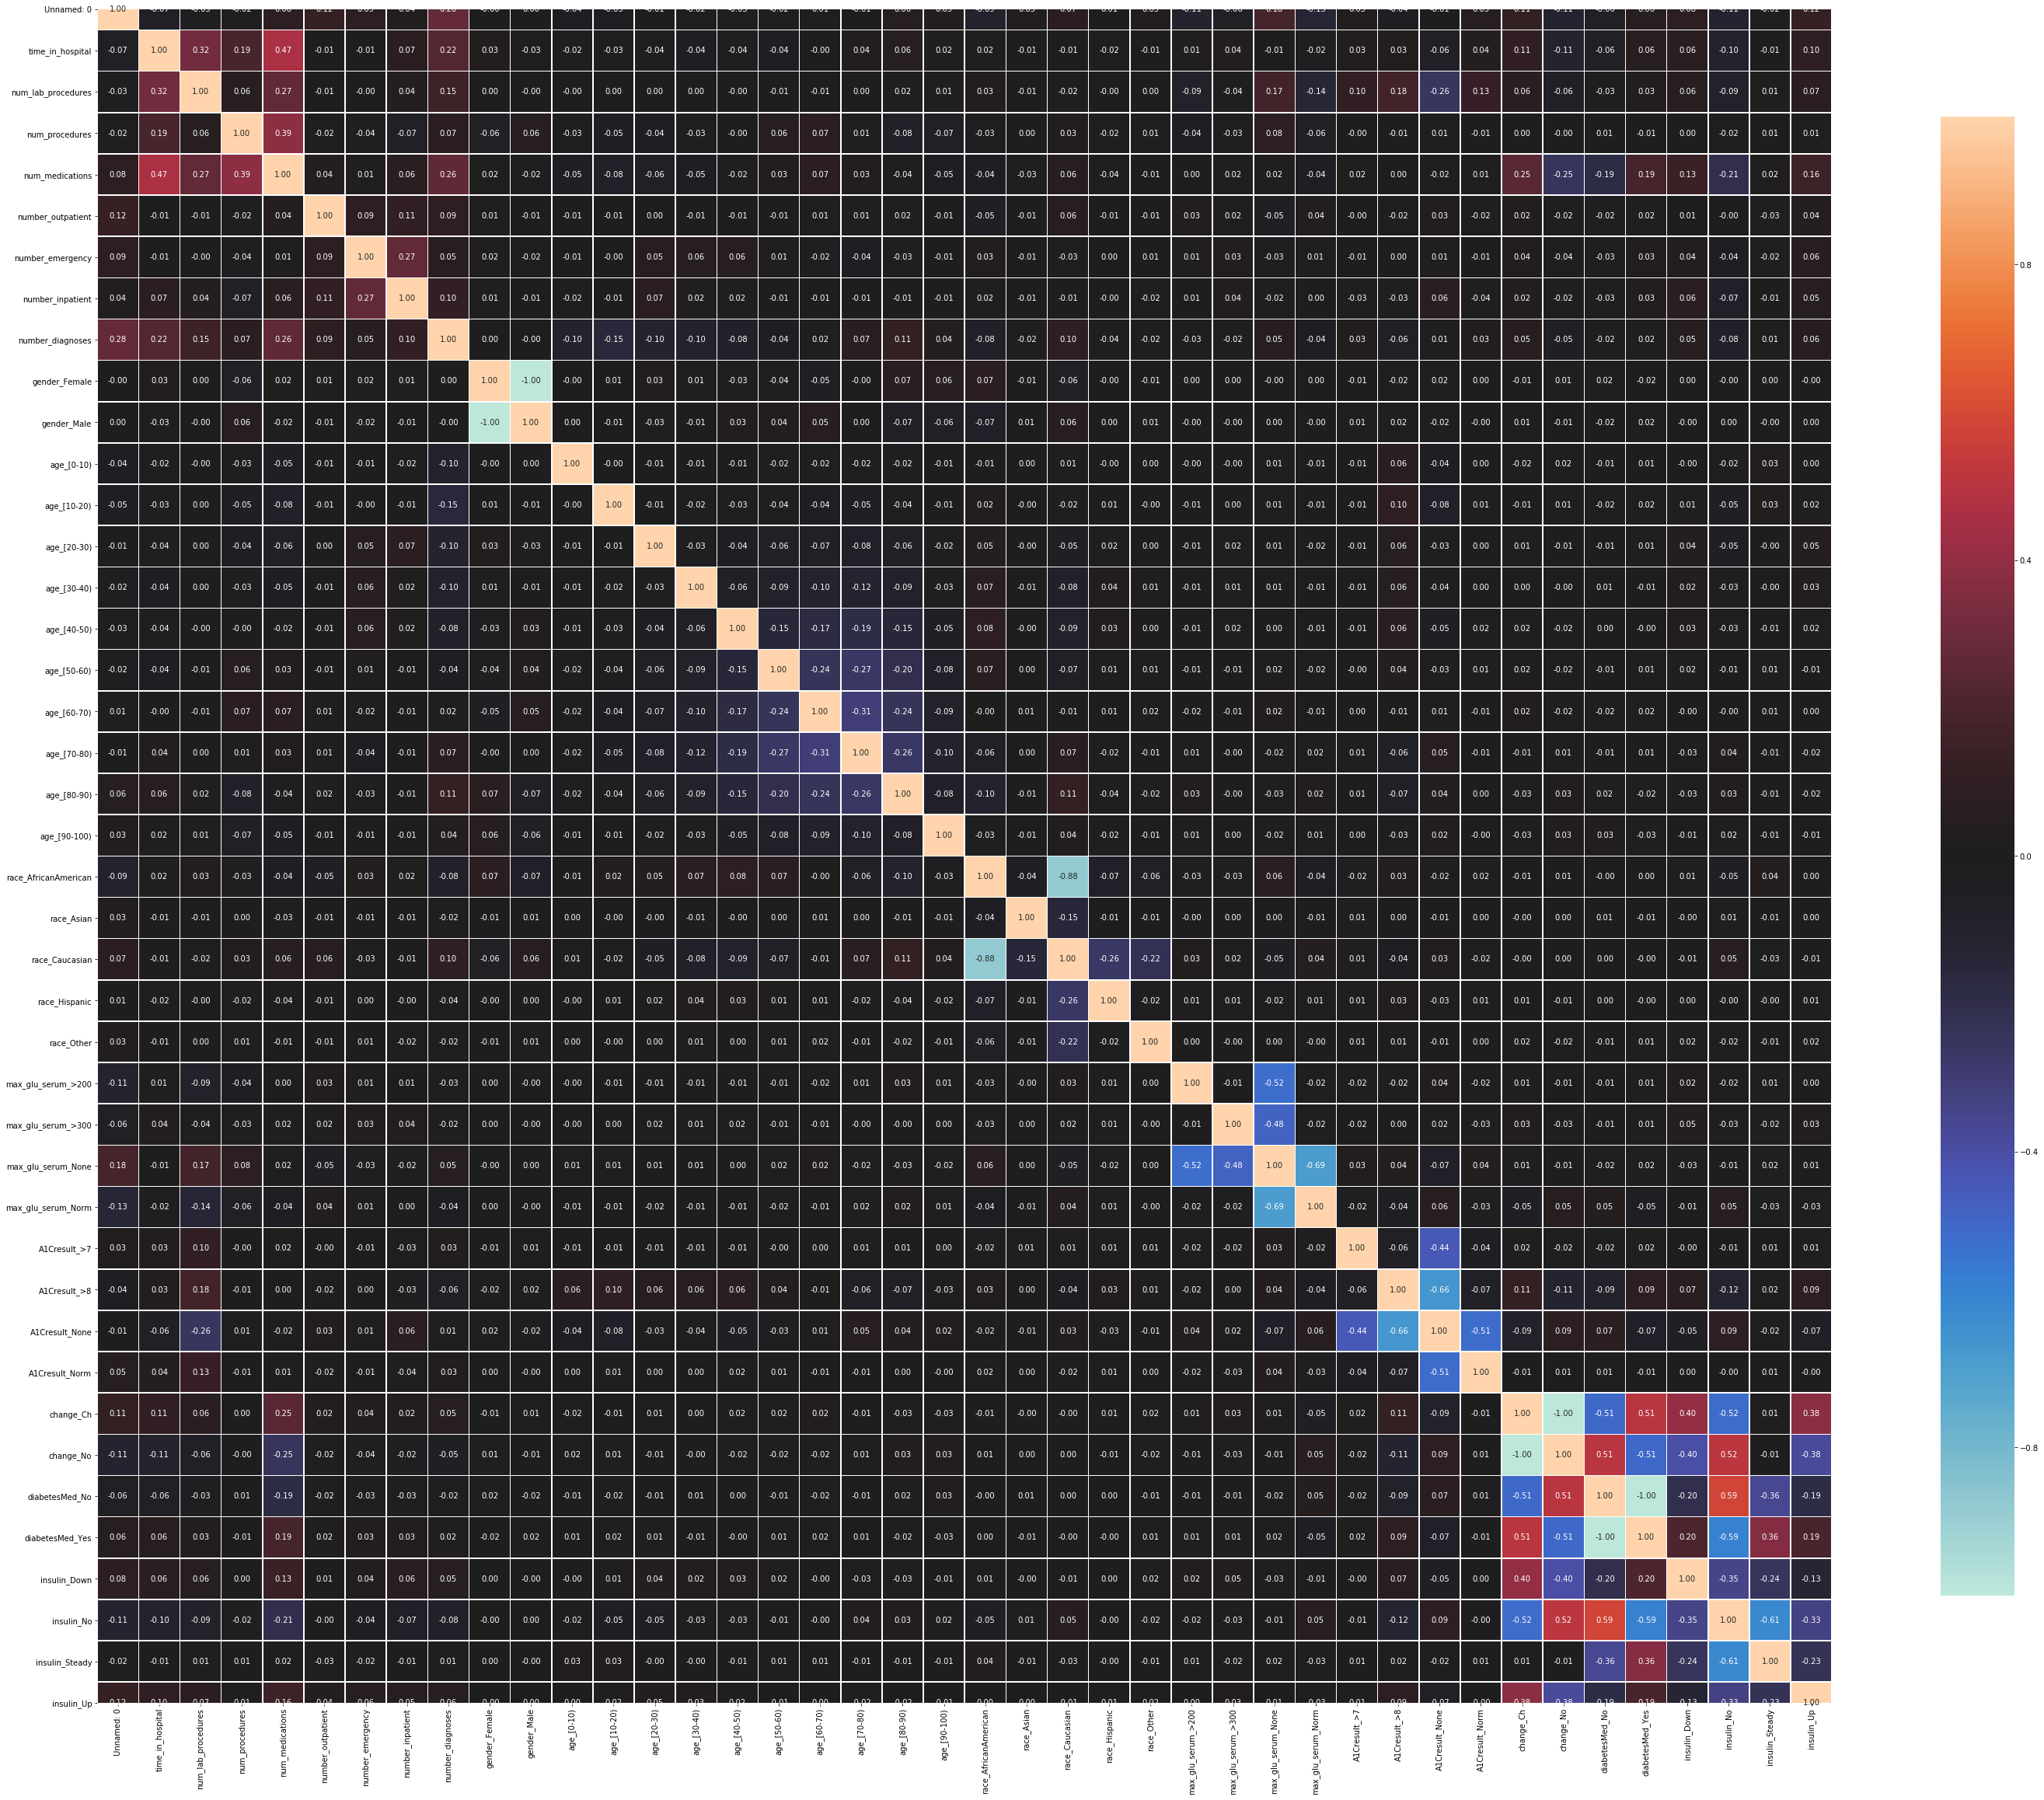

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(50,50))
    
    
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    print("\n\n")
    plt.show()
    #plt.savefig('corrmatrix.pdf')
   # print(correlations)

correlation_heatmap(data_1)

# Seperate train and test before data balancing 
## this is to ensure data integrity for the test data

In [38]:
# seperate Ys for three classification probles

y_cp1 = Ys.readmitted
y_cp2 = Ys.readmit_noreadmit
y_cp3 = Ys.readmit_in_30_days

# Classification problem : situation 1
## between three classes 0, 1, 2, the record split is 53%, 35% 11%

In [102]:
# Train test splits

X_cp1_train, X_cp1_test, y_cp1_train, y_cp1_test = train_test_split(X, y_cp1, test_size=0.25, random_state=11)

X_cp1_total = pd.concat([X_cp1_train,y_cp1_train], axis=1) # Pre up/down sampled train dataset
X_cp1_test_total = pd.concat([X_cp1_test,y_cp1_test], axis=1) # Total test data set


X_cp1_0 = X_cp1_total[X_cp1_total.readmitted == 0]
X_cp1_1 = X_cp1_total[X_cp1_total.readmitted == 1]
X_cp1_2 = X_cp1_total[X_cp1_total.readmitted == 2]


print("length of 0, 1, 2 rows: ", len(X_cp1_0.readmitted), len(X_cp1_1.readmitted), len(X_cp1_2.readmitted))


X_cp1_2_upsampled = resample(X_cp1_2, replace = True, n_samples = len(X_cp1_0), random_state=10)
X_cp1_1_upsampled = resample(X_cp1_1, replace = True, n_samples = len(X_cp1_0), random_state=10)



X_cp1_total_upsampled = pd.concat([X_cp1_0,X_cp1_1_upsampled,X_cp1_2_upsampled])

print("Upsampled length of 0, 1, 2 rows: ", len(X_cp1_0.readmitted), len(X_cp1_1_upsampled.readmitted), len(X_cp1_2_upsampled.readmitted))
print("total Upsampled dataset: cp1: ", len(X_cp1_total_upsampled)) # Up sampled train set - cp1

X_cp1_total_upsampled.readmitted.value_counts()



X_cp1_0_downsampled = resample(X_cp1_0, replace = True, n_samples = len(X_cp1_2), random_state=10)
X_cp1_1_downsampled = resample(X_cp1_1, replace = True, n_samples = len(X_cp1_2), random_state=10)


X_cp1_total_downsampled = pd.concat([X_cp1_0_downsampled,X_cp1_1_downsampled,X_cp1_2]) # downsampled train set - cp1

print("Downsampled length of 0, 1, 2 rows: ", len(X_cp1_0_downsampled.readmitted), len(X_cp1_1_downsampled.readmitted), len(X_cp1_2.readmitted))
print("total downsampled dataset: cp1: ", len(X_cp1_total_downsampled))



X_cp1_total_upsampled.to_csv('./cp1/cp1_train_upsampled.csv')
X_cp1_total_downsampled.to_csv('./cp1/cp1_train_downsampled.csv')
X_cp1_test_total.to_csv('./cp1/cp1_test.csv')



length of 0, 1, 2 rows:  39991 26219 8409
Upsampled length of 0, 1, 2 rows:  39991 39991 39991
total Upsampled dataset: cp1:  119973
Downsampled length of 0, 1, 2 rows:  8409 8409 8409
total downsampled dataset: cp1:  25227


# Classification problem : situation 2
## between three classes 0, 1, the record split is approx 50-50

In [128]:
# Train test splits

X_cp2_train, X_cp2_test, y_cp2_train, y_cp2_test = train_test_split(X, y_cp2, test_size=0.25, random_state=11)

X_cp2_total = pd.concat([X_cp2_train,y_cp2_train], axis=1) # Pre up/down sampled train dataset
X_cp2_test_total = pd.concat([X_cp2_test,y_cp2_test], axis=1) # Total test data set

print("length of test set:", len(X_cp2_test_total))

X_cp2_0 = X_cp2_total[X_cp2_total.readmit_noreadmit== 0]
X_cp2_1 = X_cp2_total[X_cp2_total.readmit_noreadmit == 1]

print("length of 0, 1 rows: ", len(X_cp2_0.readmit_noreadmit), len(X_cp2_1.readmit_noreadmit)) # fairly balanced. no need of rebalancing

length of test set: 24873
length of 0, 1 rows:  39991 34628


In [129]:
X_cp2_total.to_csv('./cp2/cp2_train.csv')
X_cp2_test_total.to_csv('./cp2/cp2_test.csv')

# Classification problem : situation 3
## between three classes 0, 1, the record split is approx 89%, 11%


In [152]:
# Train test splits

X_cp3_train, X_cp3_test, y_cp3_train, y_cp3_test = train_test_split(X, y_cp3, test_size=0.10, random_state=11)
#test data kept at 10% considering severe downsampling required.

X_cp3_total = pd.concat([X_cp3_train,y_cp3_train], axis=1) # Pre up/down sampled train dataset
X_cp3_test_total = pd.concat([X_cp3_test,y_cp3_test], axis=1) # Total test data set


X_cp3_0 = X_cp3_total[X_cp3_total.readmit_in_30_days == 0]
X_cp3_1 = X_cp3_total[X_cp3_total.readmit_in_30_days == 1]


print("length of 0, 1, 2 rows: ", len(X_cp3_0.readmit_in_30_days), len(X_cp3_1.readmit_in_30_days))


X_cp3_1_upsampled = resample(X_cp3_1, replace = True, n_samples = len(X_cp1_0), random_state=10)



X_cp3_total_upsampled = pd.concat([X_cp3_0,X_cp3_1_upsampled])

print("Upsampled length of 0, 1 rows: ", len(X_cp3_0.readmit_in_30_days), len(X_cp3_1_upsampled.readmit_in_30_days))
print("total Upsampled dataset: cp3: ", len(X_cp3_total_upsampled)) # Up sampled train set - cp1

X_cp3_total_upsampled.readmit_in_30_days.value_counts()



X_cp3_0_downsampled = resample(X_cp3_0, replace = True, n_samples = len(X_cp3_1), random_state=10)


X_cp3_total_downsampled = pd.concat([X_cp3_0_downsampled,X_cp3_1]) # downsampled train set - cp1

print("Downsampled length of 0, 1: ", len(X_cp3_0_downsampled.readmit_in_30_days), len(X_cp3_1.readmit_in_30_days))
print("total downsampled dataset: cp3: ", len(X_cp3_total_downsampled))

print("total test dataset: cp3: ", len(X_cp3_test_total))

X_cp3_total_upsampled.to_csv('./cp3/cp3_train_upsampled.csv')
X_cp3_total_downsampled.to_csv('./cp3/cp3_train_downsampled.csv')
X_cp3_test_total.to_csv('./cp3/cp3_test.csv')

length of 0, 1, 2 rows:  79469 10073
Upsampled length of 0, 1 rows:  79469 39991
total Upsampled dataset: cp3:  119460
Downsampled length of 0, 1:  10073 10073
total downsampled dataset: cp3:  20146
total test dataset: cp3:  9950
